In [72]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from common import Fonts, Colors, add_twitter_handle, add_source

In [87]:
LEGENDS = [
    "Group #1",
    "Group #2",
    "Group #3",
    "Round of 16",
    "Quarterfinals",
    "Semifinals",
    "Finals",
]
COLORS = [
    cm.get_cmap("plasma")(i / (len(LEGENDS) - 1)) for i in range(0, len(LEGENDS))
]

In [110]:
def plot_minutes(year, team, truncate = False):
    # Read in data
    df = pd.read_csv("data/minutes_" + year + ".csv")
    df = df[df["team"] == team]
    df = df.drop(columns=["team"])
    if truncate:
        df = df.drop(columns=["quarterfinals", "semifinals", "finals"])
    df = df.set_index("player")
    df = df.dropna(axis=1, how="all")
    df["total"] = df.sum(axis=1)
    df = df.sort_values("total", ascending=False)

    # Set up plot
    plt.rcParams["figure.figsize"] = (12, 10)
    plt.figure(dpi=400)
    fig, ax = plt.subplots()
    fig.patch.set_facecolor(Colors.WHITE)

    # Plot data
    left = np.zeros(len(df.index))
    bars = []
    for i, column in enumerate(df.columns[:-1]):
        bars.append(
            plt.barh(range(0, len(df.index)), df[column], color=COLORS[i], left=left)
        )
        left += df[column]

    # Plot totals
    for i, data in enumerate(df.iterrows()):
        player, row = data
        ax.text(
            row["total"] + 3,
            i,
            str(int(row["total"])) + "'",
            fontproperties=Fonts.BARLOW,
            color=Colors.BLACK,
            size=16,
            va="center",
        )

    # Legend
    fp = Fonts.BARLOW
    fp.set_size(16)
    plt.rcParams["legend.handlelength"] = 1.2
    plt.rcParams["legend.handleheight"] = 1.5
    plt.legend(bars, LEGENDS[0 : len(df.columns) - 1], loc="lower right", prop=fp)

    # Axes
    ax.spines[["top", "bottom", "right"]].set_visible(False)
    ax.set_axisbelow(True)
    ax.xaxis.grid(True, color=Colors.LIGHT_GRAY)
    ax.invert_yaxis()
    xmax = int(math.ceil(df.iloc[0]["total"] / 100.0)) * 100
    ax.set_xticks(range(0, xmax + 1, 100))
    ax.set_xlim([0, xmax + 1])
    ax.set_xlabel(
        "Minutes",
        fontproperties=Fonts.BARLOW,
        color=Colors.BLACK,
        size=16,
    )
    ax.set_yticks(range(0, len(df.index)))
    ax.set_yticklabels(df.index)
    ax.set_ylim([22.5, -0.5])
    ax.tick_params(axis="both", which="both", length=0)
    for label in ax.get_yticklabels() + ax.get_xticklabels():
        fp = Fonts.BARLOW
        fp.set_size(16)
        label.set_fontproperties(fp)

    # Title
    ax.text(
        0,
        -1.5,
        year + " World Cup Minutes: " + team,
        fontproperties=Fonts.BARLOW_BOLD,
        color=Colors.BLACK,
        size=28,
        ha="left",
    )

    # Twitter logo and username
    add_twitter_handle(fig, x=0.8, y=0.04, fs=14, w=0.025)
    add_source(fig, "FBRef", x=0, y=0.04, fs=14)

    # Save image
    plt.savefig(
        "images/minutes/"
        + year
        + "_minutes_"
        + team.replace(" ", "")
        + ("_truncate" if truncate else "")
        + ".png",
        bbox_inches="tight",
        transparent=False,
        pad_inches=0.5,
        dpi=200,
    )

<Figure size 4800x4000 with 0 Axes>

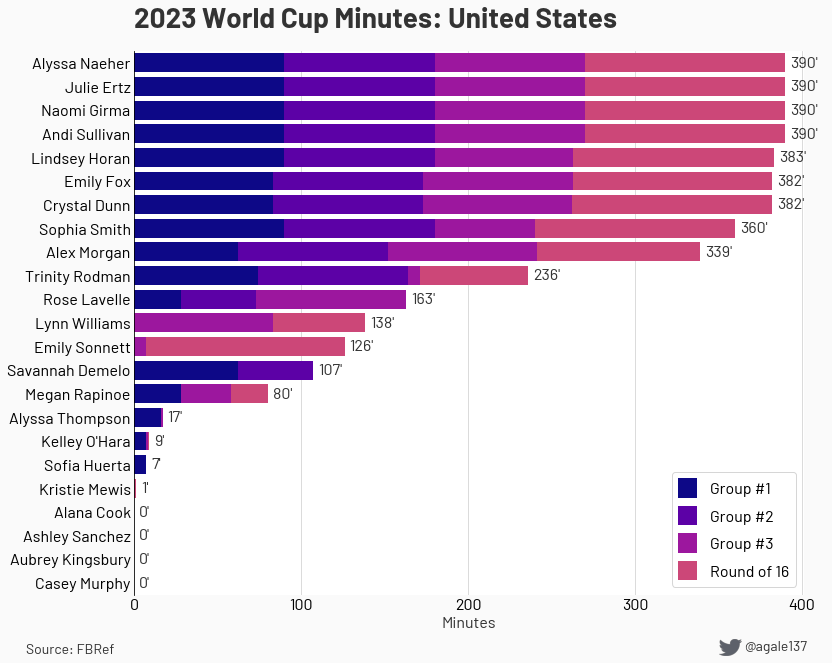

In [111]:
plot_minutes("2023", "United States")

<Figure size 4800x4000 with 0 Axes>

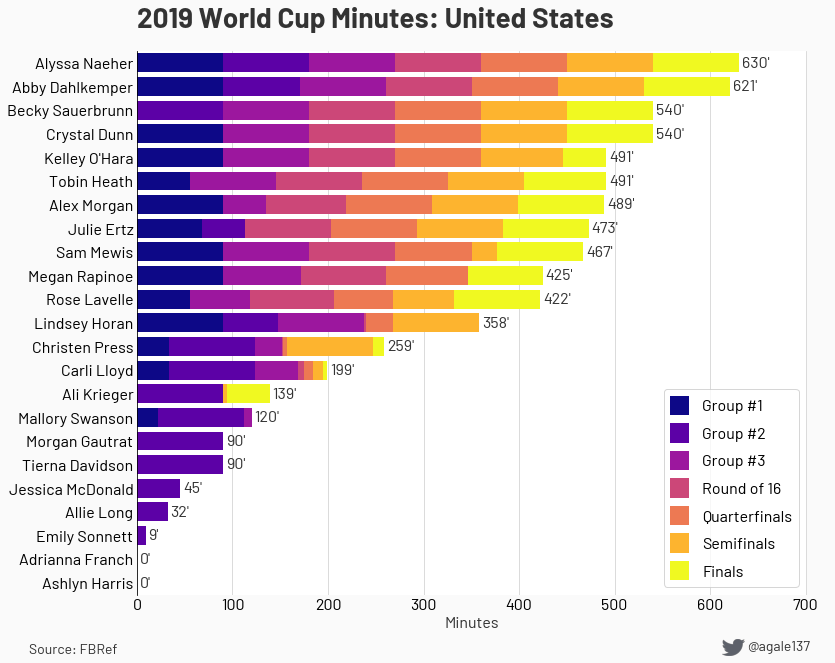

In [112]:
plot_minutes("2019", "United States")

<Figure size 4800x4000 with 0 Axes>

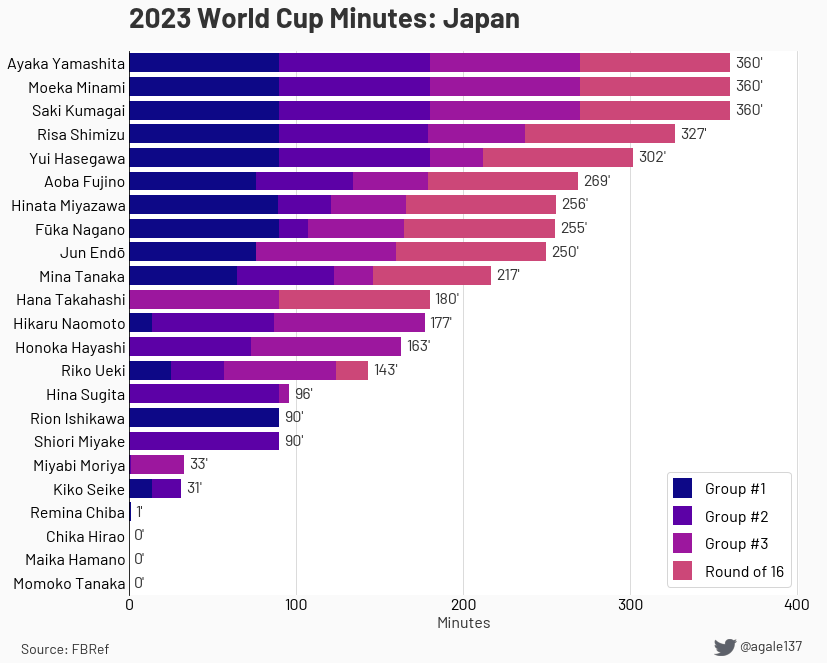

In [113]:
plot_minutes("2023", "Japan")

<Figure size 4800x4000 with 0 Axes>

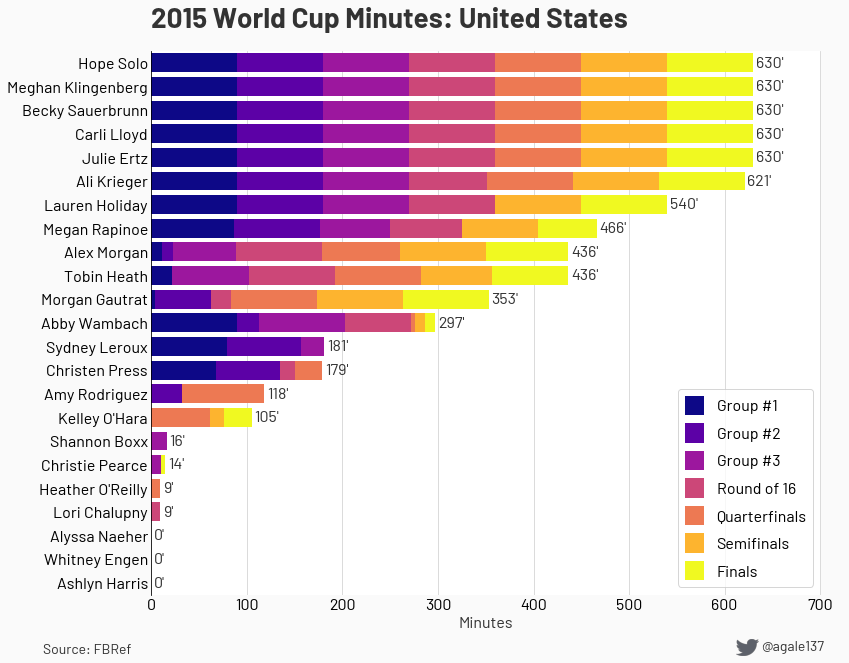

In [114]:
plot_minutes("2015", "United States")

<Figure size 4800x4000 with 0 Axes>

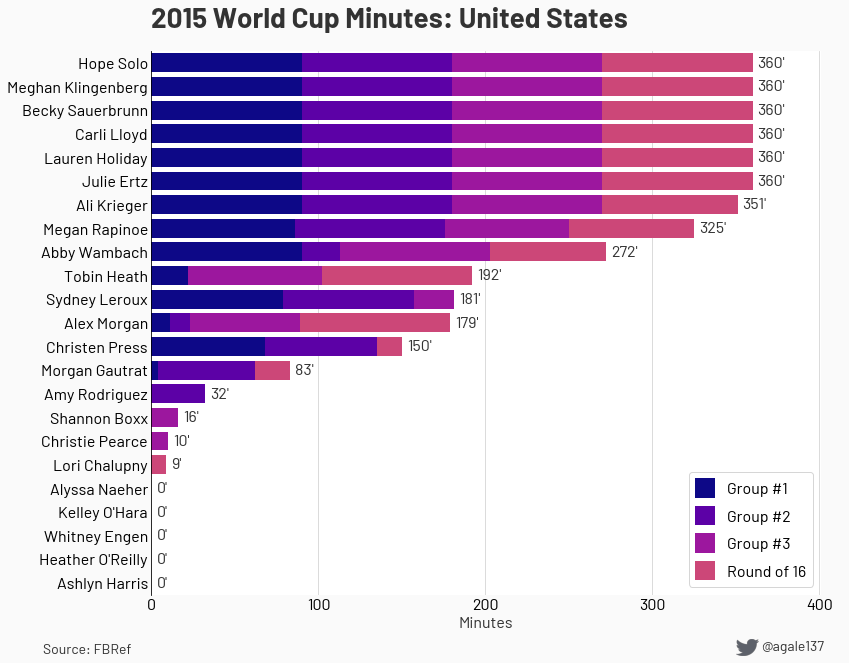

In [115]:
plot_minutes("2015", "United States", True)

<Figure size 4800x4000 with 0 Axes>

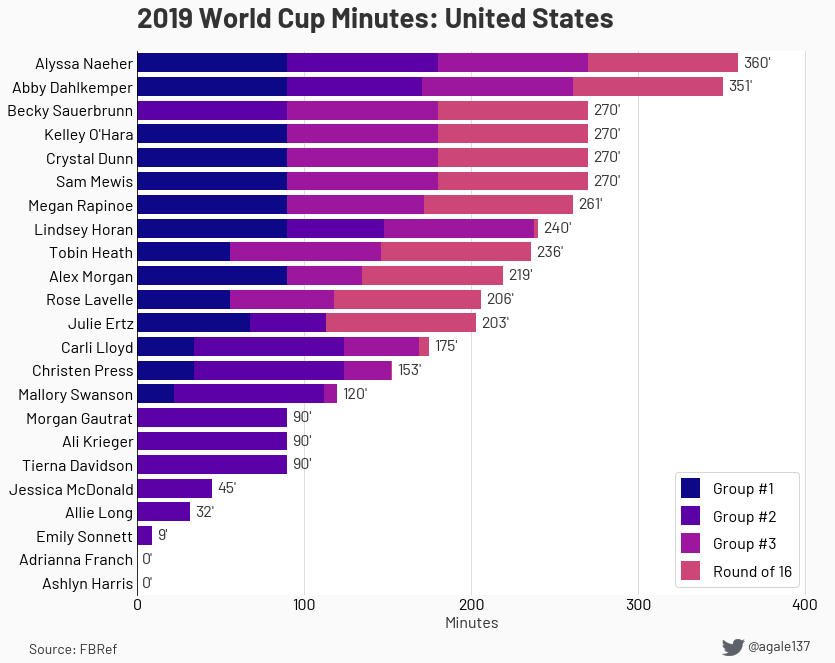

In [116]:
plot_minutes("2019", "United States", True)

<Figure size 4800x4000 with 0 Axes>

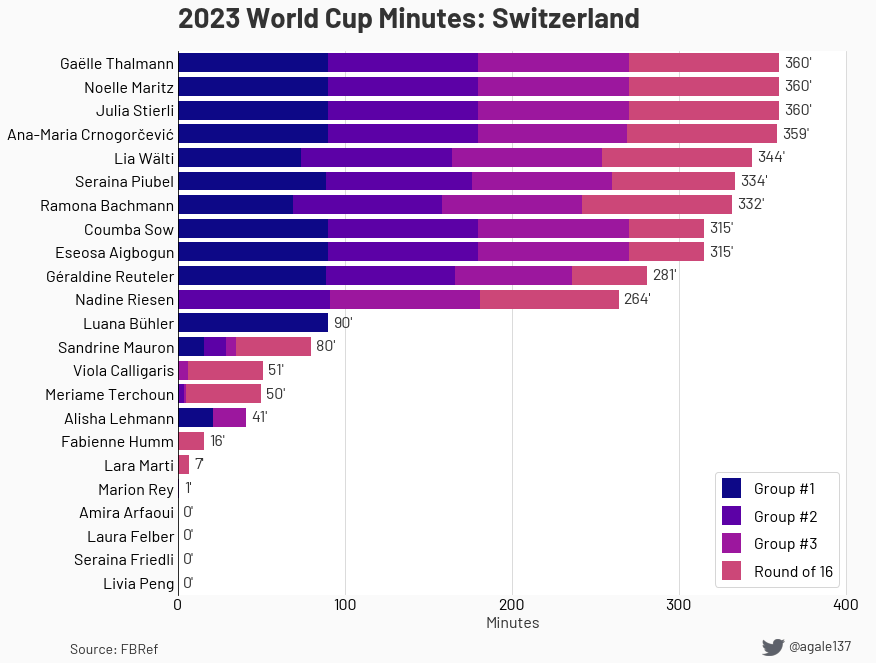

In [117]:
plot_minutes("2023", "Switzerland")

<Figure size 4800x4000 with 0 Axes>

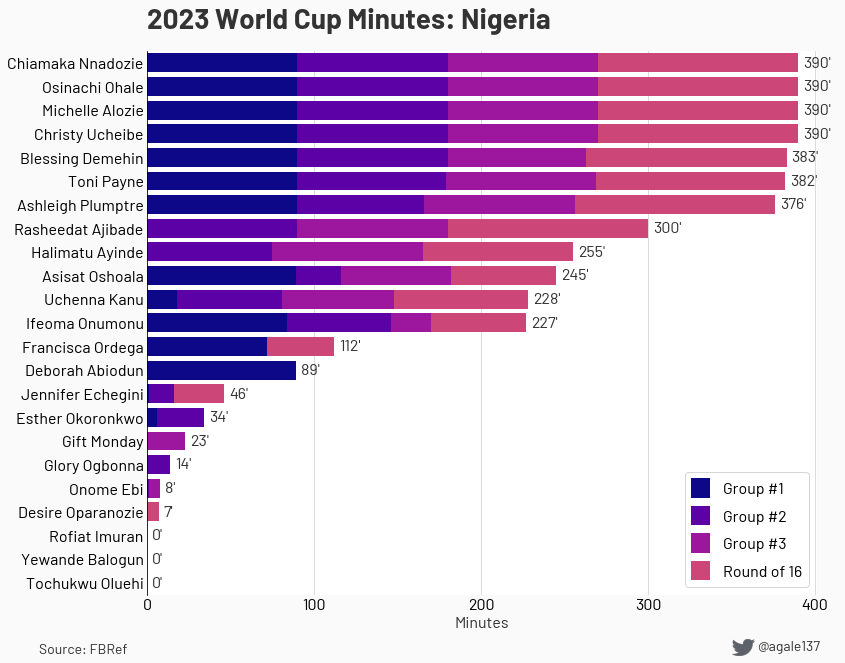

In [118]:
plot_minutes("2023", "Nigeria")

<Figure size 4800x4000 with 0 Axes>

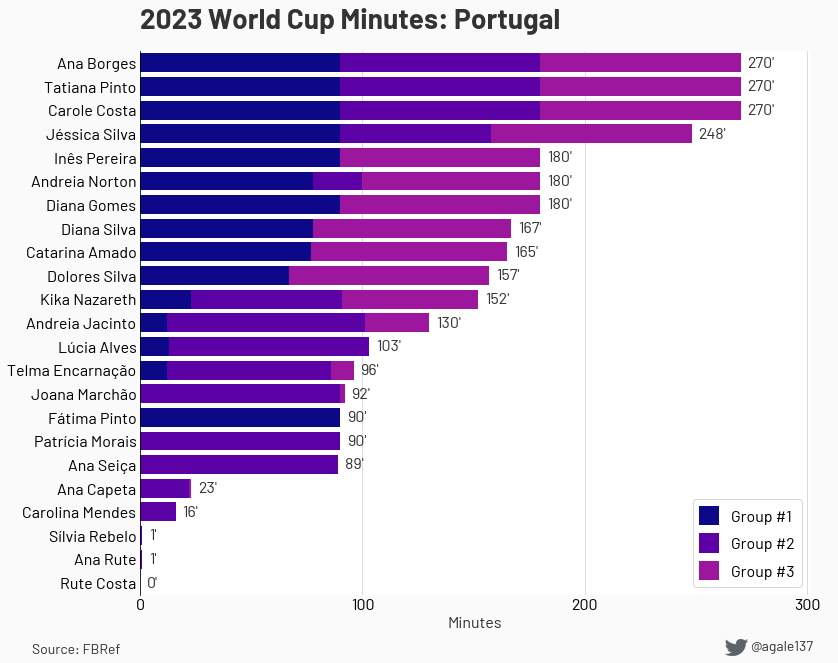

In [119]:
plot_minutes("2023", "Portugal")

<Figure size 4800x4000 with 0 Axes>

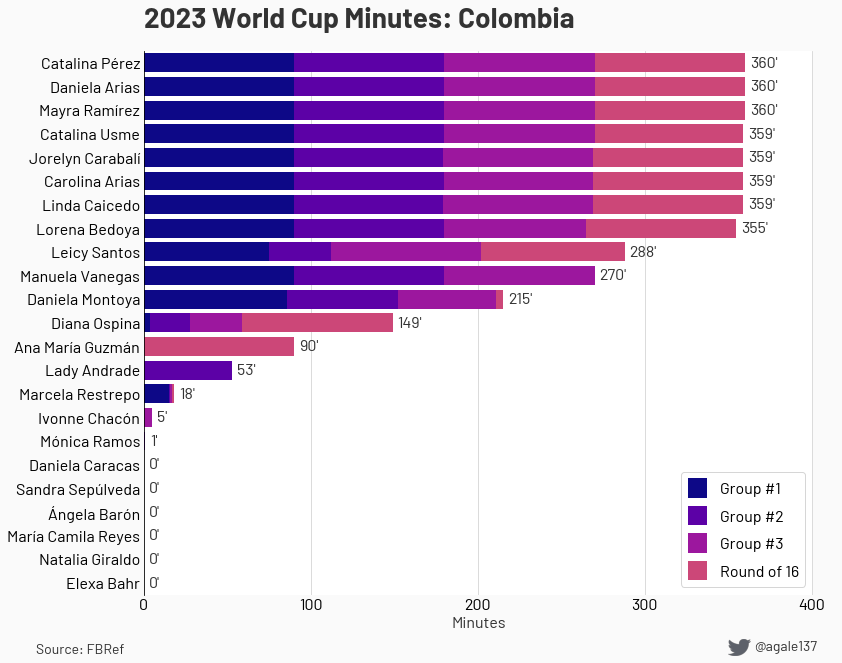

In [120]:
plot_minutes("2023", "Colombia")

<Figure size 4800x4000 with 0 Axes>

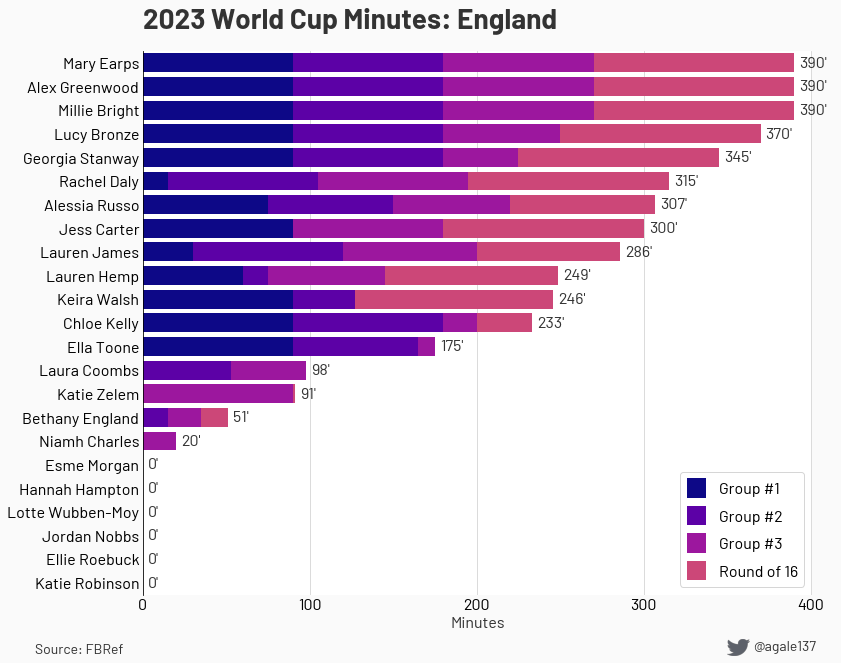

In [121]:
plot_minutes("2023", "England")

<Figure size 4800x4000 with 0 Axes>

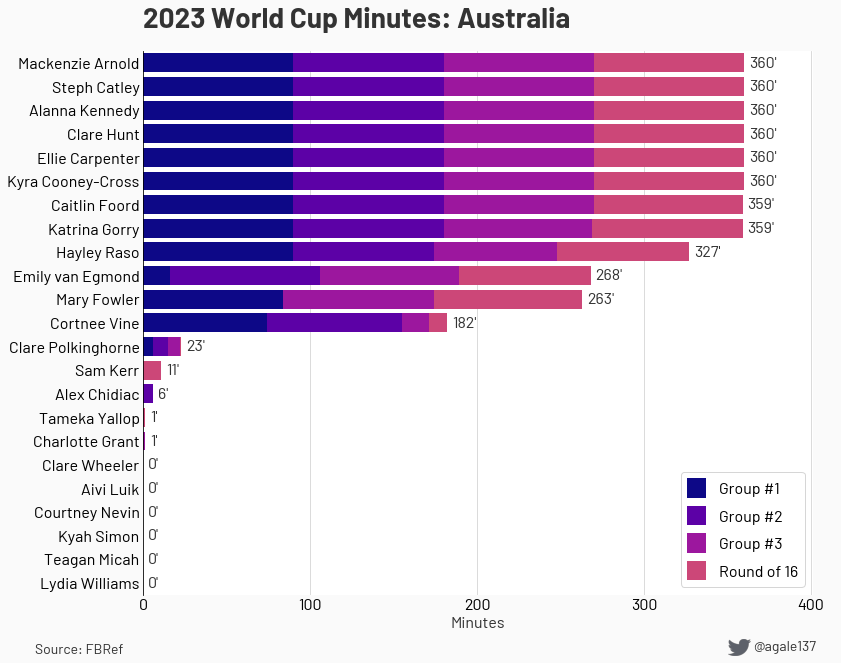

In [122]:
plot_minutes("2023", "Australia")

<Figure size 4800x4000 with 0 Axes>

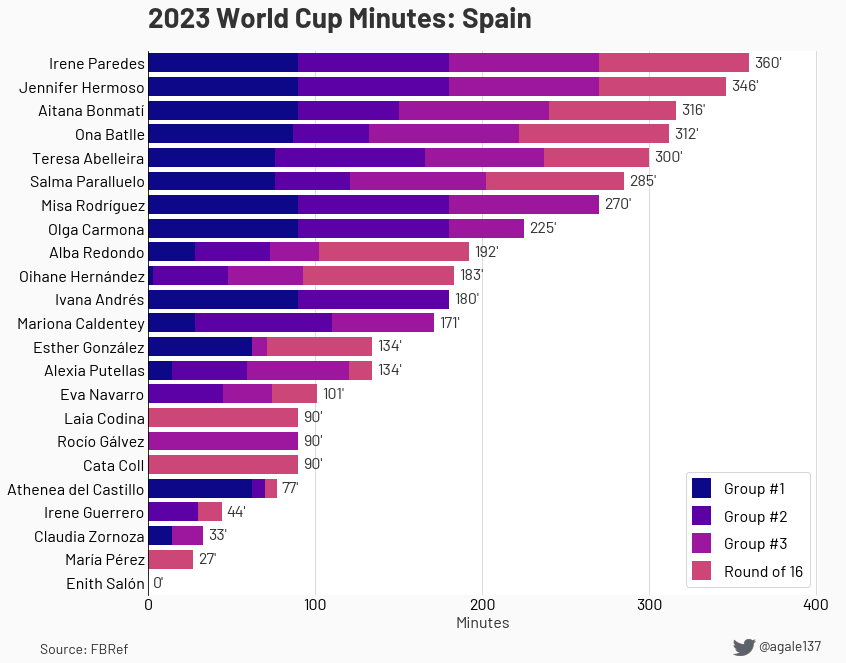

In [123]:
plot_minutes("2023", "Spain")

<Figure size 4800x4000 with 0 Axes>

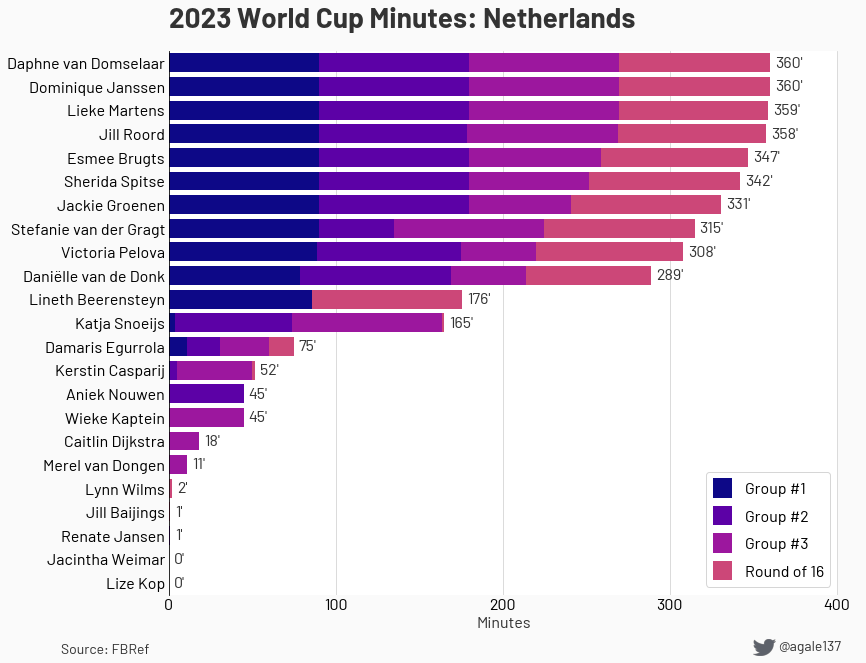

In [124]:
plot_minutes("2023", "Netherlands")

<Figure size 4800x4000 with 0 Axes>

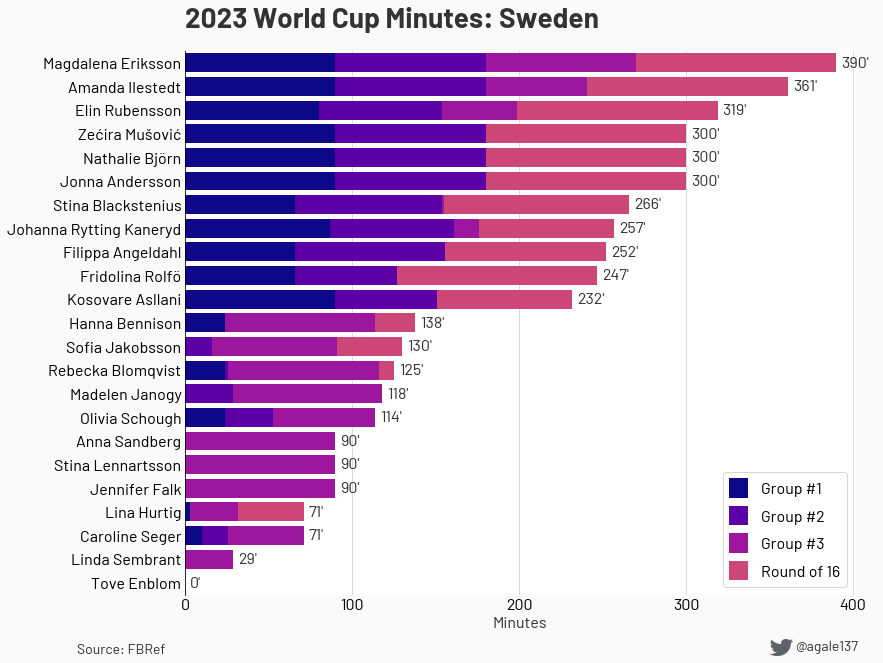

In [125]:
plot_minutes("2023", "Sweden")

<Figure size 4800x4000 with 0 Axes>

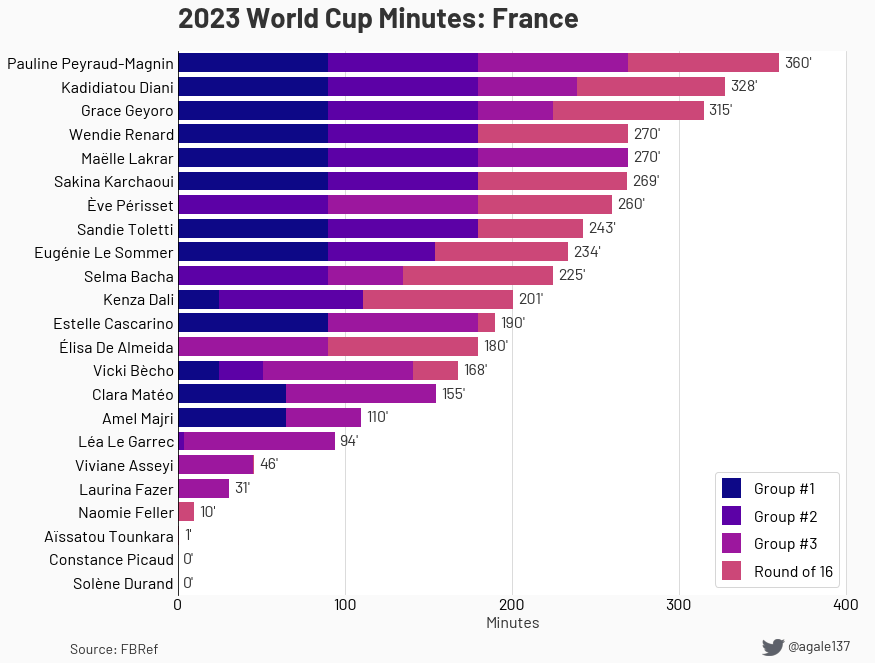

In [127]:
plot_minutes("2023", "France")